In [563]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [564]:
df = pd.read_json("dataset/ultimate_challenge/logins.json")

In [565]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [566]:
df = df.sort_index()

In [567]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


# Part 1

Aggregate these login counts based on 15 minute time intervals and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand 

In [569]:
# check interval every 15 minutes

df["interval_count"] = 1

df = df.set_index("login_time").resample(rule="15MIN").sum()


In [570]:
# get day of week
day_of_week = df.reset_index()["login_time"].apply(lambda x: x.strftime("%a"))
df["day_of_week"] = day_of_week.values

In [571]:
df.head()

,interval_count,day_of_week
login_time,,
1970-01-01 20:00:00,2,Thu
1970-01-01 20:15:00,6,Thu
1970-01-01 20:30:00,9,Thu
1970-01-01 20:45:00,7,Thu
1970-01-01 21:00:00,1,Thu


In [572]:
df["interval_count"].sum()

93142

<Figure size 1080x576 with 0 Axes>

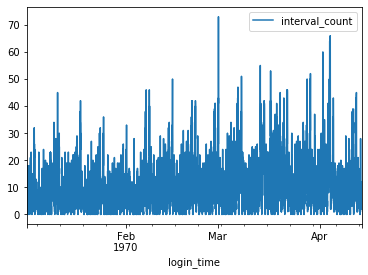

In [573]:
# plot using whole data
plt.figure(figsize=(15, 8))
df.plot()


It seems every week peak is coming, Let's look more specifically

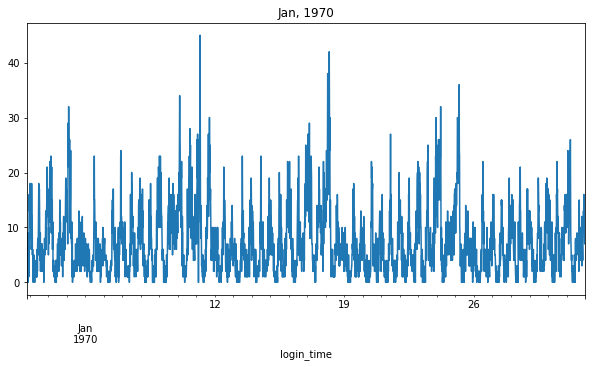

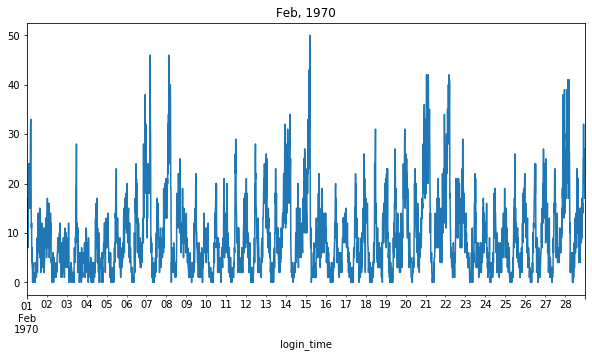

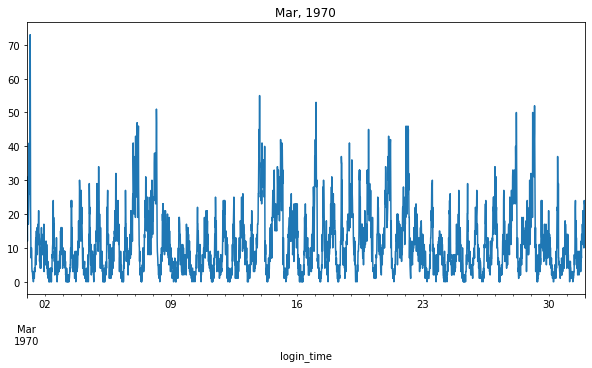

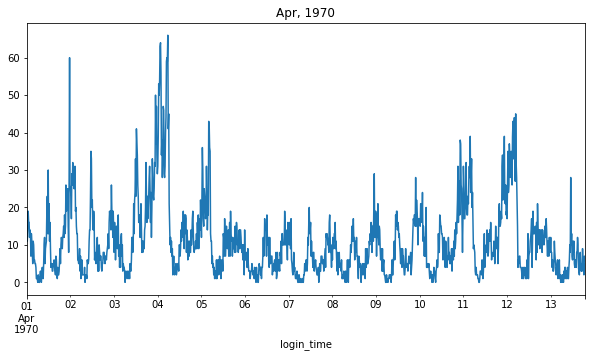

In [574]:
# check each Month
df["1970-01"].plot(figsize=(10, 5), title="Jan, 1970", legend="")
df["1970-02"].plot(figsize=(10,5), title="Feb, 1970", legend="")
df["1970-03"].plot(figsize=(10, 5), title="Mar, 1970", legend="")
df["1970-04"].plot(figsize=(10, 5), title="Apr, 1970", legend="")

apploximatry every 12 hour peak was coming, Let's look at specificday

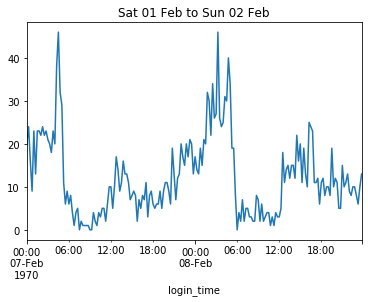

In [575]:
df["1970-02-07": "1970-02-08"].plot(title="Sat 01 Feb to Sun 02 Feb", legend="")

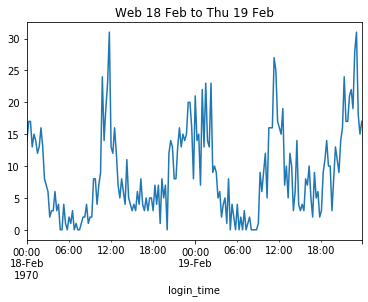

In [576]:
df["1970-02-18": "1970-02-19"].plot(title="Web 18 Feb to Thu 19 Feb", legend="")

I plot weekend and weekdays, doesn't seem like having the same pattern.  But on the weekend many people in same period log in more than weekdays. Let's check which time is most frequency each day of week.

In [577]:
df = df.reset_index()

In [579]:
df

,login_time,interval_count,day_of_week
0,1970-01-01 20:00:00,2,Thu
1,1970-01-01 20:15:00,6,Thu
2,1970-01-01 20:30:00,9,Thu
3,1970-01-01 20:45:00,7,Thu
4,1970-01-01 21:00:00,1,Thu
...,...,...,...
9783,1970-04-13 17:45:00,5,Mon
9784,1970-04-13 18:00:00,5,Mon
9785,1970-04-13 18:15:00,2,Mon
9786,1970-04-13 18:30:00,7,Mon


In [584]:
day_ave = df.groupby(["day_of_week", df["login_time"].dt.time]).agg([np.sum, np.mean, np.std])
day_ave.columns = day_ave.columns.droplevel()

In [589]:
day_ave["upper"] = day_ave["mean"] + 2* day_ave["std"]
day_ave["lower"] = day_ave["mean"] - 2* day_ave["std"]

# crate day column
day_ave["day"] = day_ave.reset_index()["day_of_week"].tolist()

In [590]:
 day_ave.head()

sum       mean       std      upper     lower  day
day_of_week login_time                                                    
Fri         00:00:00    237  15.800000  7.282072  30.364144  1.235856  Fri
            00:15:00    263  17.533333  5.139020  27.811373  7.255294  Fri
            00:30:00    232  15.466667  5.180550  25.827766  5.105567  Fri
            00:45:00    243  16.200000  5.479833  27.159666  5.240334  Fri
            01:00:00    259  17.266667  6.385997  30.038660  4.494673  Fri

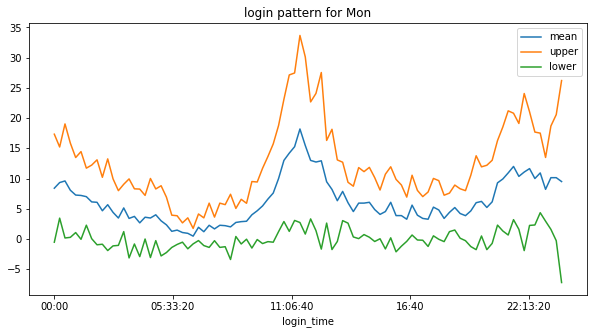

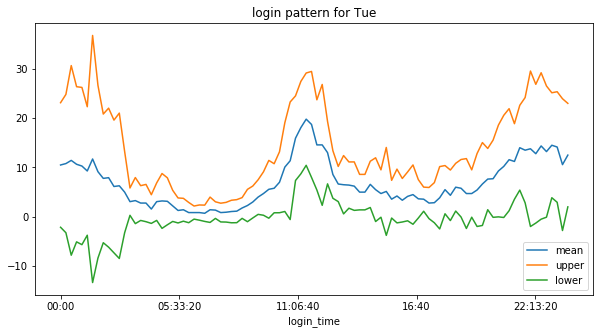

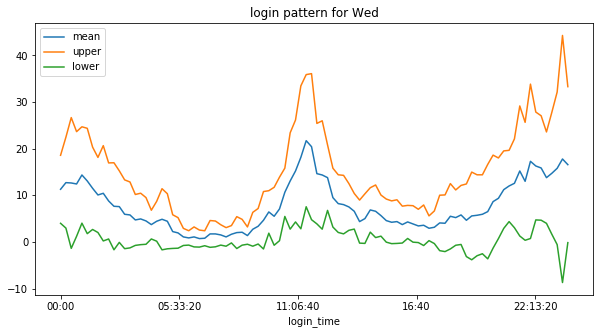

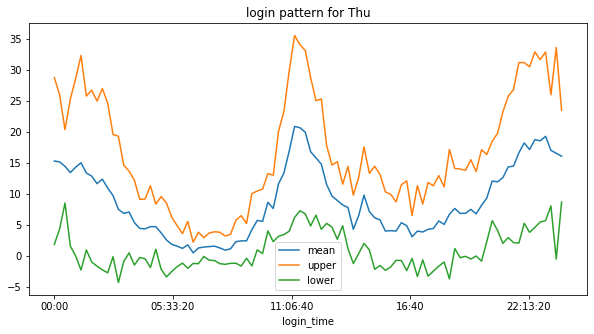

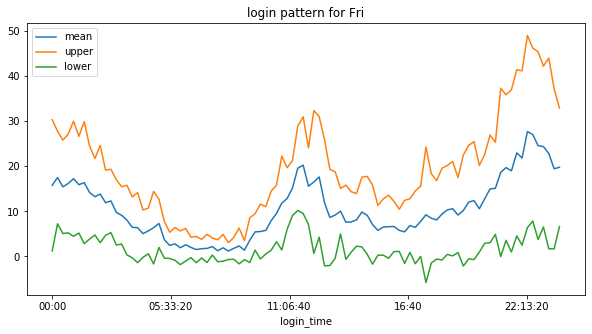

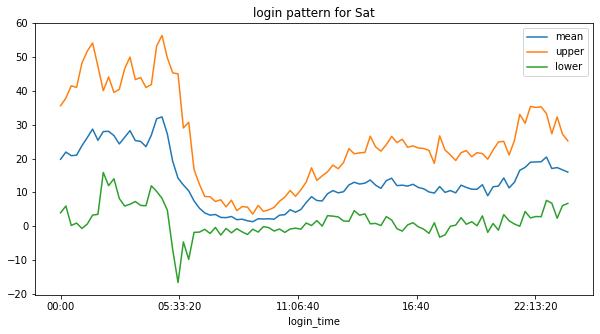

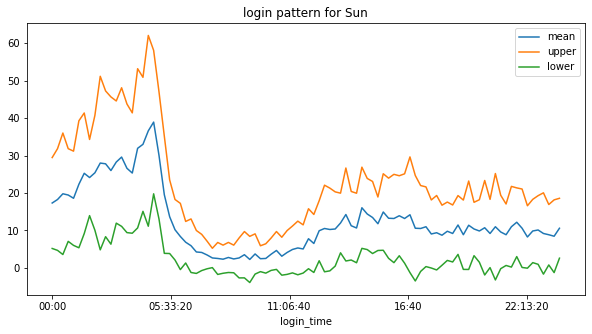

In [600]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

for day in days:
    ax = day_ave[day_ave["day"] == day].unstack(level=0)["mean"].plot(figsize=(10, 5))
    day_ave[day_ave["day"] == day].unstack(level=0)["upper"].plot(ax=ax)
    day_ave[day_ave["day"] == day].unstack(level=0)["lower"].plot(ax=ax)
    ax.set_title("login pattern for {}".format(day))
    ax.legend(["mean", "upper", "lower"])
    

# Conclusion

・Demand is higher on the weekend than weekdays.

・During the weekdays 12 noon, 11 am and after 10 pm in high demand.

・On the weekend demand is high between 12 noon and 5 am.